Assignment Question:

Some ML algorithms

KNN

SVM

Decision Trees

Random forest

Research the algorithms above and write a brief review of each.
Implement any of them or other algorithms that you may like as an end-to-end project. That means you should present a project that involves data cleaning, EDA, data preprocessing, Model building, and model evaluation. Remember to use proper documentation (most of the exercises you submitted last week were not properly documented).
This is a group project, please spend Monday and Tuesday working on this project. Let me know if you have any challenges.
PS: I suggest you check out sample projects on Kaggle.

**SOLUTIONS**

 * K-Nearest Neighbours is a simple yet powerful machine learning algorithm used for classification and regression tasks. It predicts the label or value of a new data point based on the majority class or average value of its k nearest neighbors in the feature space. The choice of k is crucial, impacting model performance, with smaller values risking overfitting and larger ones leading to underfitting. Despite its simplicity and effectiveness, KNN's computational cost grows with dataset size, and its performance relies on distance metric choice and data distribution.


   
 * Support Vector Machine Support is a machine learning method for classification and regression tasks. It finds the best line or boundary to separate different classes of data while maximizing the space between the data points and this line. It can handle both linear and nonlinear relationships and works well with small to medium-sized datasets. However, it can be computationally intensive and requires careful selection of parameters for optimal performance.

 * Decision Tree is a machine learning model that makes predictions by dividing the data into branches based on features, forming a hierarchical structure. It's straightforward and interpretable, suitable for classification and regression tasks. However, it may overfit and require tuning to improve generalization.

 * Random Forest is a machine learning approach that harnesses the collective wisdom of multiple decision trees. Instead of relying on a single decision tree, it builds a "forest" of trees, each trained on a random subset of the data and a random subset of features. This randomness introduces diversity among the trees, which helps to reduce overfitting and improve generalization. When making predictions, the Random Forest combines the outputs of all the trees, typically through a voting mechanism for classification tasks or averaging for regression tasks. This ensemble approach often results in more accurate and robust predictions compared to individual trees. Random Forest is widely used across various domains due to its versatility, scalability, and ability to handle complex datasets with high-dimensional features. Additionally, it provides insights into feature importance, making it valuable for feature selection and understanding the underlying patterns in the data.




In [36]:
!pip install scikit-learn==0.24.2
!pip install streamlit==1.7.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 34.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1634 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      <string>:116: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
  

In [7]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report


In [11]:
data=pd.read_csv('Oral Cancer Consolidated-latest-numeric1 1.csv')

Drop all the columns with only True and False values because they are not useful for our model


In [12]:
data=data.drop(data.columns[6:18],axis=1)
data.head()

,Donor ID,Project Code,Primary Site,Gender,Age at Diagnosis,Survival Time (days),Mutated Genes,Tumor Stage at Diagnosis
0,DO27935,ORCA-IN,Head and neck,1,55,788,145,20
1,DO50673,ORCA-IN,Head and neck,1,45,1206,265,20
2,DO50723,ORCA-IN,Head and neck,0,65,354,122,20
3,DO27917,ORCA-IN,Head and neck,1,40,224,44,20
4,DO50725,ORCA-IN,Head and neck,1,26,285,278,20


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Donor ID                  1505 non-null   object
 1   Project Code              1505 non-null   object
 2   Primary Site              1505 non-null   object
 3   Gender                    1505 non-null   int64 
 4   Age at Diagnosis          1505 non-null   int64 
 5   Survival Time (days)      1505 non-null   object
 6   Mutated Genes             1505 non-null   int64 
 7   Tumor Stage at Diagnosis  1505 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 94.2+ KB


We drop the columns with object type as well

In [14]:
data=data.drop(data.columns[:3],axis=1)
data.head()

,Gender,Age at Diagnosis,Survival Time (days),Mutated Genes,Tumor Stage at Diagnosis
0,1,55,788,145,20
1,1,45,1206,265,20
2,0,65,354,122,20
3,1,40,224,44,20
4,1,26,285,278,20


Next we try to convert the Survival Time (days) column from object to integer type

In [15]:
data=data['Survival Time (days)'].astype(int)

ValueError: invalid literal for int() with base 10: '?'

We have an error so we must check the values of our column

In [16]:
data['Survival Time (days)'].unique()

array(['788', '1206', '354', '224', '285', '842', '863', '227', '837',
       '429', '300', '364', '384', '425', '221', '809', '813', '1026',
       '764', '939', '774', '303', '770', '796', '341', '333', '848',
       '480', '937', '213', '763', '259', '502', '371', '949', '814',
       '336', '251', '478', '246', '710', '852', '448', '248', '170',
       '379', '445', '368', '747', '1033', '927', '526', '80', '1005',
       '278', '392', '991', '760', '389', '447', '233', '257', '350',
       '405', '338', '712', '701', '522', '882', '826', '218', '192',
       '116', '231', '202', '396', '166', '347', '135', '881', '758',
       '353', '173', '486', '689', '234', '457', '907', '748', '182',
       '296', '407', '917', '196', '358', '513', '459', '128', '1151',
       '505', '304', '940', '2326', '841', '895', '634', '693', '983',
       '845', '377', '2562', '784', '818', '853', '601', '1855', '2071',
       '969', '585', '1988', '1023', '15', '916', '125', '938', '1042',
       '20

There is a '?' value preventing us from converting our column to integer type. Therefore, we need to clean our data. We will replace it with the mean survival time.

In [17]:
data['Survival Time (days)']=data['Survival Time (days)'].replace('?',0).astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    1505 non-null   int64
 1   Age at Diagnosis          1505 non-null   int64
 2   Survival Time (days)      1505 non-null   int64
 3   Mutated Genes             1505 non-null   int64
 4   Tumor Stage at Diagnosis  1505 non-null   int64
dtypes: int64(5)
memory usage: 58.9 KB


Now we replace the 0 we inserted earlier with the mean Survival Time

In [19]:
data_mean=data['Survival Time (days)'].mean().round().astype(int)
data_mean

400

In [20]:
data['Survival Time (days)']=data['Survival Time (days)'].replace(0,data_mean)

In [21]:
data.head()

,Gender,Age at Diagnosis,Survival Time (days),Mutated Genes,Tumor Stage at Diagnosis
0,1,55,788,145,20
1,1,45,1206,265,20
2,0,65,354,122,20
3,1,40,224,44,20
4,1,26,285,278,20


**EXPLORATORY DATA ANALYSIS**

Checking the gender distribution

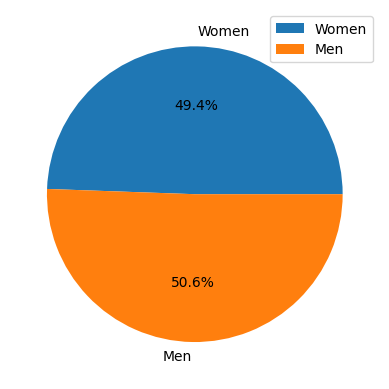

In [22]:
num_women=data['Gender'].sum()
num_men=data.shape[0]-num_women
total=[num_women,num_men]
labels=['Women','Men']
plt.pie(total,labels=labels,autopct='%1.1f%%')
plt.legend()
plt.show()

Plotting Age against Survival Time

Text(0.5, 1.0, 'Survival Time vs Age')

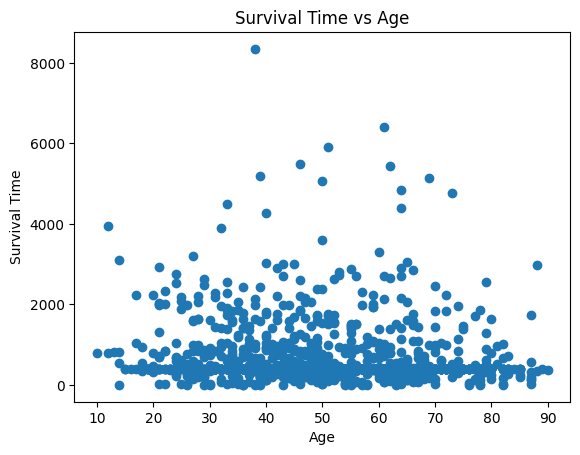

In [23]:
plt.scatter(data['Age at Diagnosis'],data['Survival Time (days)'])
plt.ylabel('Survival Time')
plt.xlabel("Age")
plt.title("Survival Time vs Age")

<Axes: xlabel='Tumor Stage at Diagnosis', ylabel='Age at Diagnosis'>

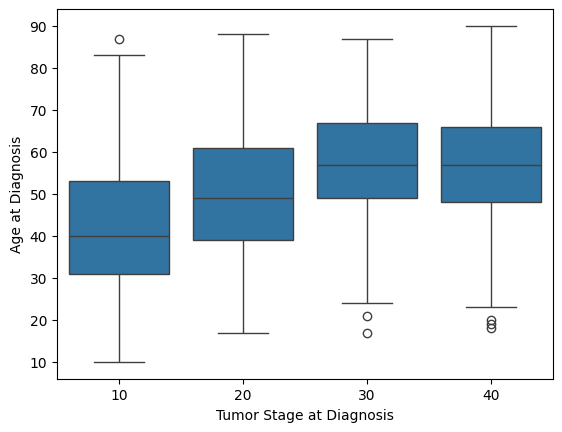

In [24]:
sns.boxplot(data,x=data['Tumor Stage at Diagnosis'],y=data['Age at Diagnosis'])


From the box plot, we can see that most people that are diagnosed are above 30 years old.

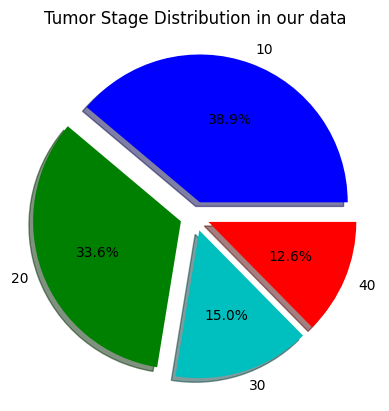

In [25]:

plt.pie(data['Tumor Stage at Diagnosis'].value_counts(),explode=(0.1,0.1,0.1,0.1), autopct='%1.1f%%',shadow=True, labels = ['10','20','30','40'],colors=['b','g','c','r'])
plt.title("Tumor Stage Distribution in our data")
plt.show()

Text(0.5, 0, 'Age at Diagnosis')

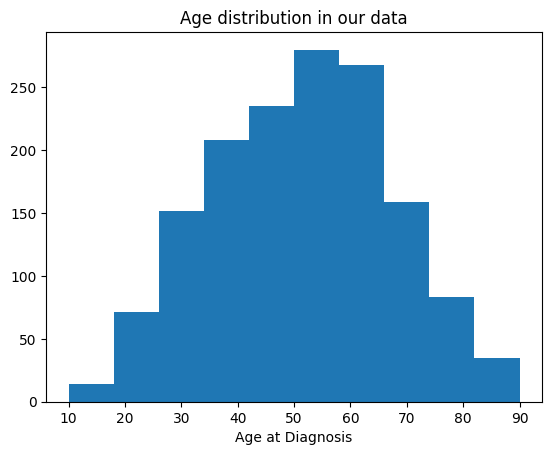

In [26]:
plt.hist(data['Age at Diagnosis'])
plt.title("Age distribution in our data")
plt.xlabel("Age at Diagnosis")

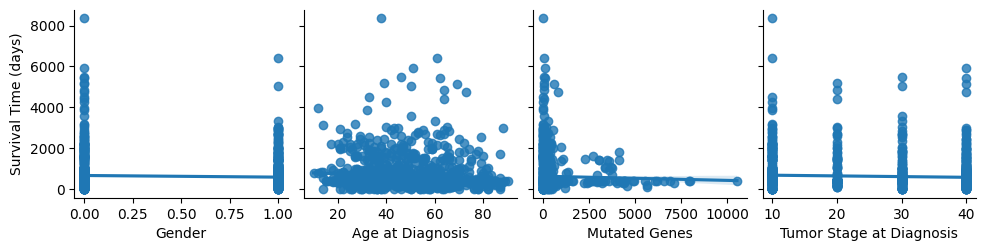

In [27]:
sns.pairplot(data,x_vars=['Gender','Age at Diagnosis','Mutated Genes','Tumor Stage at Diagnosis'],y_vars=['Survival Time (days)'],kind='reg')

In [28]:
data.corr()

,Gender,Age at Diagnosis,Survival Time (days),Mutated Genes,Tumor Stage at Diagnosis
Gender,1.000000,0.176028,-0.057268,0.136717,0.266851
Age at Diagnosis,0.176028,1.000000,-0.091684,0.055140,0.406424
Survival Time (days),-0.057268,-0.091684,1.000000,-0.024034,-0.063303
Mutated Genes,0.136717,0.055140,-0.024034,1.000000,0.172507
Tumor Stage at Diagnosis,0.266851,0.406424,-0.063303,0.172507,1.000000


In [29]:
X=data.drop('Survival Time (days)',axis=1).values #Independent variables
y=data['Survival Time (days)'].values #Dependent variable
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

Iteration number 1.......
The current MAE is 436.6478405315615
The current best k value is 2 and the lowest MAE is 436.6478405315615
Iteration number 2.......
The current MAE is 444.74861572535997
The current best k value is 2 and the lowest MAE is 436.6478405315615
Iteration number 3.......
The current MAE is 429.26827242524917
The current best k value is 4 and the lowest MAE is 429.26827242524917
Iteration number 4.......
The current MAE is 418.36943521594685
The current best k value is 5 and the lowest MAE is 418.36943521594685
Iteration number 5.......
The current MAE is 414.3732004429678
The current best k value is 6 and the lowest MAE is 414.3732004429678
Iteration number 6.......
The current MAE is 415.5709539629806
The current best k value is 6 and the lowest MAE is 414.3732004429678
Iteration number 7.......
The current MAE is 407.281561461794
The current best k value is 8 and the lowest MAE is 407.281561461794
Iteration number 8.......
The current MAE is 406.3241048357328
The

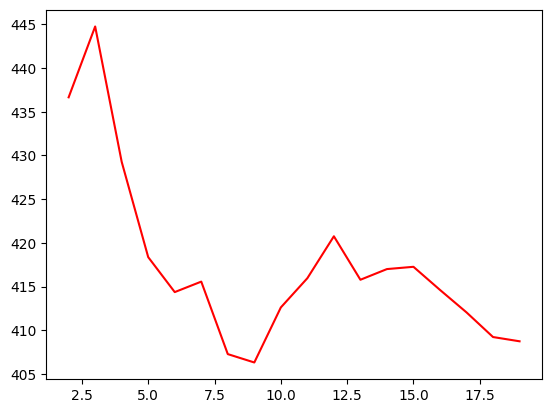

In [30]:
k_val_min = 2
test_MAE_array = []
k_array = []
MAE = 1000000000
count=0
for k in range(2, 20):
    count+=1
    print(f"Iteration number {count}.......")
    model = KNeighborsRegressor(n_neighbors=k).fit(train_x, train_y)
    y_predict = model.predict(test_x)
    y_true = test_y
    test_MAE = mean_absolute_error(y_true, y_predict)
    print(f"The current MAE is {test_MAE}")
    if test_MAE < MAE:
        MAE = test_MAE
        k_val_min = k
    test_MAE_array.append(test_MAE)
    k_array.append(k)

    print(f"The current best k value is {k_val_min} and the lowest MAE is {MAE}")

plt.plot(k_array, test_MAE_array,'r')
plt.show()

From our code, the best value of k is 9.

In [31]:
model=KNeighborsRegressor(n_neighbors=9)
model.fit(train_x,train_y)
predictions=model.predict(test_x)


In [34]:
import pickle
import os
model_data={'model': model}

# File path where you want to save the model
file_path = 'model.pkl'

# Ensure the directory exists, create it if it doesn't
"""directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)"""

# Save the model to the file
try:
    with open(file_path, 'wb') as file:
        pickle.dump(model_data, file)
    print(f"Data saved successfully to {file_path}")
except Exception as e:
    print("Error occurred while saving data:", e)


Data saved successfully to model.pkl


In [35]:
with open(file_path,'rb') as file:
    model_data=pickle.load(file)
model=model_data['model']

In [ ]:
data['Mutated Genes'].min()

In [ ]:
val=np.array([1,55,145,20]).reshape(1,-1)
print(model.predict(val)[0])

In [ ]:
gender='Male'
age=12
genemutations=234
tumorstage=40

gender_encoded = 0 if gender == 'Male' else 1  # Encoding gender as numerical value

        # Create feature vector
X = np.array([gender_encoded, age, genemutations, tumorstage],dtype=int).reshape(1, -1)
X

        #

In [ ]:
model.predict(X)[0]